# importing Tensorflow 

In [2]:
import tensorflow as tf

print(tf.__version__)


2.4.1


#### Fashion MNIST dataset is alvaible in the tensor and keras dataset API so  you can get it through below line of code

In [5]:
mnist=tf.keras.datasets.fashion_mnist



#### The below cell will do two things 


1.   Split the dataset in train and test images , train images is for training and test image is for checking and test the accurracy on unseen data
2.   Split the dataset in train and test images labels 
 
Note :
this dataset contain 10 object pictures so the object are labelled from 0 to 9 



In [8]:
(training_images ,training_labels) , (testing_images , testing_labels) = mnist.load_data()

##### What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index of ur choice...that's a a different boot than the one at index 4

0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 189 206 187  32   0   0   0  26 217 226 196  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 192 227 234 243 230 147 239 242 234 218 209   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 225 215 233 254   0 194 240 217 221 190   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 139 229 212 226 255   0 162 255 213 226 200   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98 232 211 215 249  46 162 246 214 230 186   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  70 228 213 220 224 252 239 219 217 231 171   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 222 214 218 216 210 215 217 202 224 172   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24 254 214 210 211 214 215 212 203 221 167 

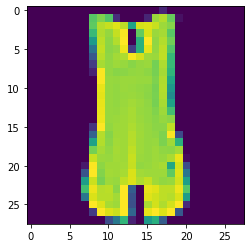

In [9]:
import numpy as np # For some computatiuon
np.set_printoptions(linewidth=200) # Context manager for setting print options.

import matplotlib.pyplot as plt # For displaying 
plt.imshow(training_images[4]) # Show the images on index $ in traing images 

print(training_labels[4]) # For showing the label
print(training_images[4]) # For showing the image


#### You noticed that all of the values in the number are between 0 and 255.it's easier if we treat all values as between 0 and 1 for training nueral network for various reasons so the processes is called  <mark>Normalization

In [10]:
training_images=training_images/255.0 # these are For training 
testing_images=testing_images/255.0  # these are For testing model after  training

## Now its to design The Model 
### 1 <mark>Sequential<mark> 
 That defines a SEQUENCE of layers in the neural network

### 2 <mark>Flatten<mark>
Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

### 3 <mark>Dense<mark>
Adds a layer of neurons....Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.
In last Dense layer specify the number of nuerons according to ur number of object ie classes
### 4 <mark>Relu<mark>
Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

### 5 <mark>Softmax<mark>
Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!




In [11]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128 , activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10 ,activation=tf.nn.softmax)]
)

### Now the model is Ready so Its time to compile it 
Three things are used here 

### <mark>Optimizer<mark>
it will optimize the loss of your function

### <mark>Loss<mark>
Loss is the Difference between the Actual data and Pridection...So the Loss show how much is it different from Actual value

### <mark>metrics<mark>
it is used for How Much it is  accurate ... The Accuracy will show in figure like 0.9556 it means that it is 95 % accurate 



In [17]:
model.compile(optimizer = tf.optimizers.Adam(), loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])

### Now fit the model 
Use fit and pass training_images , training and epochs
### <mark>Epochs<mark> 
Epochs is used for how much time it will iterating 

In [18]:
model.fit(training_images ,training_labels , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6187 - accuracy: 0.7874
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8613
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

### Now Evaluate the Model 
Check the Accuracy of the Model using Test Images 

In [19]:
model.evaluate(testing_images , testing_labels  )

313/313 [==============================] - 1s 1ms/step - loss: 0.3411 - accuracy: 0.8802


[0.3411116898059845, 0.8802000284194946]

### The accuracy is 88 % so now do some exercise on it that is it work properly or not 
It will show the probibality of 10 classes 

In [20]:
prediction = model.predict(testing_images)

print(prediction[3])

[8.3517143e-08 9.9997711e-01 1.6055611e-10 2.0704152e-05 1.4424271e-06 1.1521710e-14 6.3521259e-07 2.5228829e-18 5.6095597e-11 8.6533225e-16]


In [22]:
print(testing_labels[3])

1


Class Labell =  1 



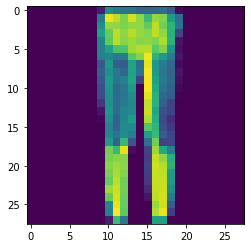

In [30]:
import numpy as np # For some computatiuon
np.set_printoptions(linewidth=200) # Context manager for setting print options.

import matplotlib.pyplot as plt # For displaying 
plt.imshow(testing_images[3]) # Show the images on index $ in traing images 

print('Class Labell = ',testing_labels[3] , '\n' ) # For showing the label
#print(testing_images[3]) # For showing the image
